In [1]:
import pandas as pd

PLTR = '/kaggle/input/palantir-stock-data-latest-and-updated/Palantir_stock_history.csv'

df = pd.read_csv(filepath_or_buffer=PLTR, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year
0,2020-09-30,10.00,11.41,9.11,9.50,338584400,0,0,2020
1,2020-10-01,9.69,10.10,9.23,9.46,124297600,0,0,2020
2,2020-10-02,9.06,9.28,8.94,9.20,55018300,0,0,2020
3,2020-10-05,9.43,9.49,8.92,9.03,36316900,0,0,2020
4,2020-10-06,9.04,10.18,8.90,9.90,90864000,0,0,2020


How many records do we have?

In [2]:
len(df), df['year'].value_counts().to_dict()

(281, {2021: 216, 2020: 65})

We have a little more than a year's worth of quotes, spread over two years.

In [3]:
df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.983666,0.988719,0.979208,0.157381
High,0.983666,1.000000,0.975183,0.990540,0.235527
Low,0.988719,0.975183,1.000000,0.986109,0.110084
Close,0.979208,0.990540,0.986109,1.000000,0.185291
Volume,0.157381,0.235527,0.110084,0.185291,1.000000


We have no duplicate data, and the prices and volume are slightly positively correlated. Let's look at the price time series.

<Axes: xlabel='Date', ylabel='Close'>

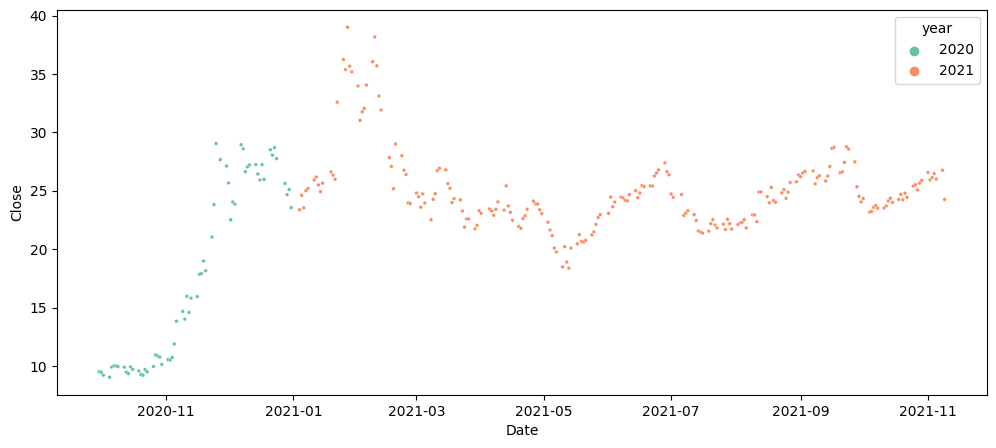

In [4]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

FIGSIZE=(12, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Date', y='Close', hue='year', s=7, palette='Set2')

Over the period of interest the stock had an early run-up, then retrenched and traded in a pretty tight range. Let's have a look at the price/volume graph.

<Axes: xlabel='Close', ylabel='Volume'>

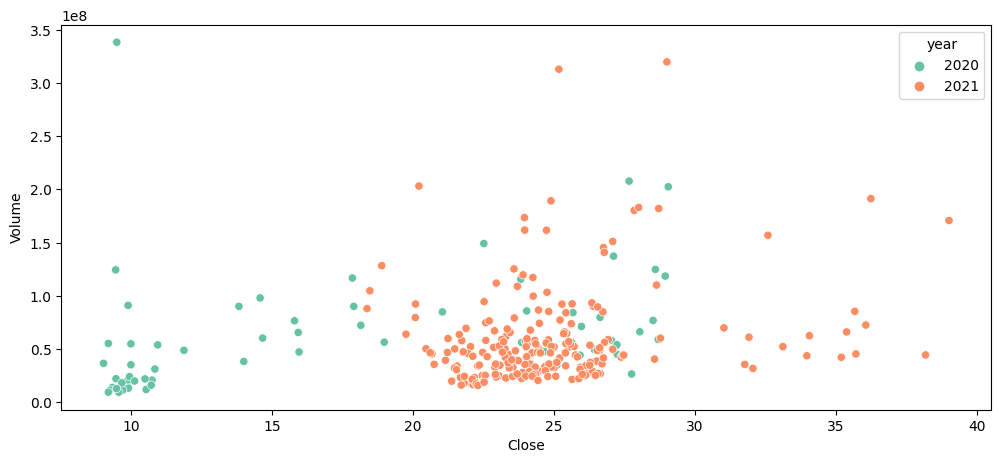

In [5]:
plt.figure(figsize=FIGSIZE)
scatterplot(data=df, x='Close', y='Volume', hue='year', palette='Set2')

This looks almost like a tale of two stocks, as we might have expected from the time series above, but also we see that the volume seems to be a little higher in the higher price regime.